# Ford GoBike system data analysis
## by Dana Alotaibi

## Investigation Overview

> Using the information from the dataset I will perform my analysis focusing on the trips duration, everyday’s trips starting date and travelled distance, since there are two types of users I will compare these users based on the duration and distance and other trip details like starting time, busiest days. 

## Dataset Overview

> This dataset contains up to 182148 entries about the bike rides at may 2019 ( one month) in the San Francisco Bay Area.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df_clean=pd.read_csv('201905-baywheels-tripdataMaster.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User type split for GoBike sharing system visualization

> This Visualization demonestrate the difference in number between customers and subscribers where subscribers are far larger than customers
 

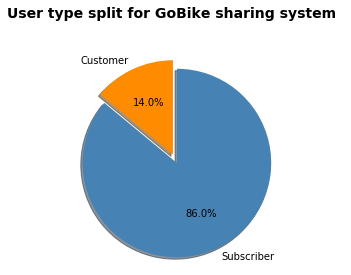

In [21]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');




## Ford GoBike System Trip Duration in Minutes Visualization 

> This visualization shows the duration of most rides which approximately is between (5-15) minutes 


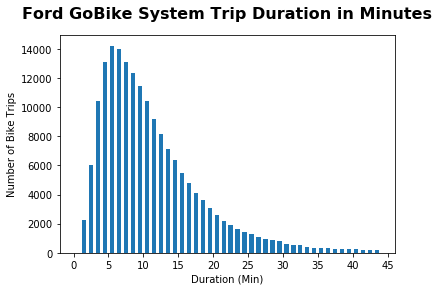

In [22]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');



## Daily and hourly distribution of rides 

> This visualization shows exactly the Strat time of bike rides each day


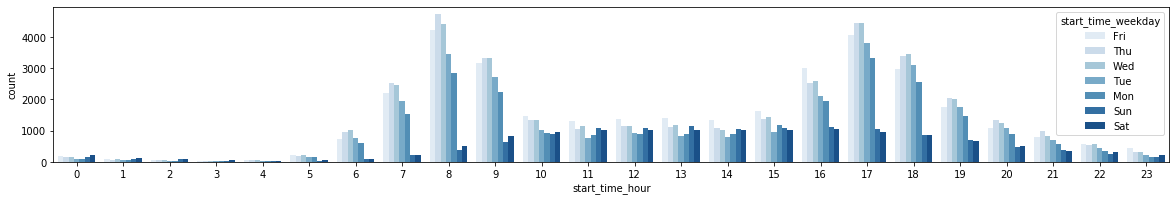

In [23]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_weekday', palette = 'Blues');

## Daily usage of the bike share system per user type visualization

> This visualization shows the Difference between customers and subscribers rides during each day

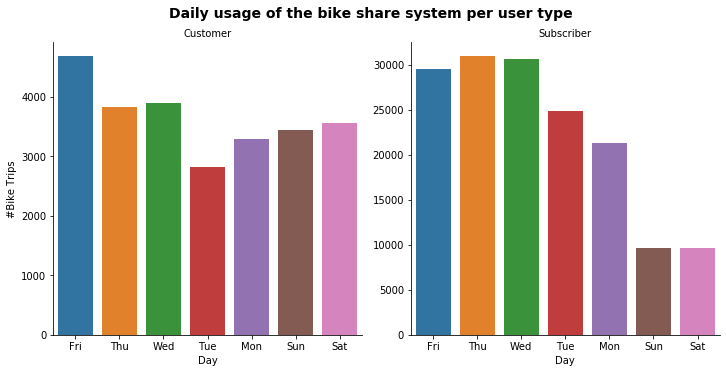

In [34]:
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Day", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

## Ford Go Bike System Average Distance (Miles) by User Type visualization
> This visualization compares the travelled distance between customers and subscribers

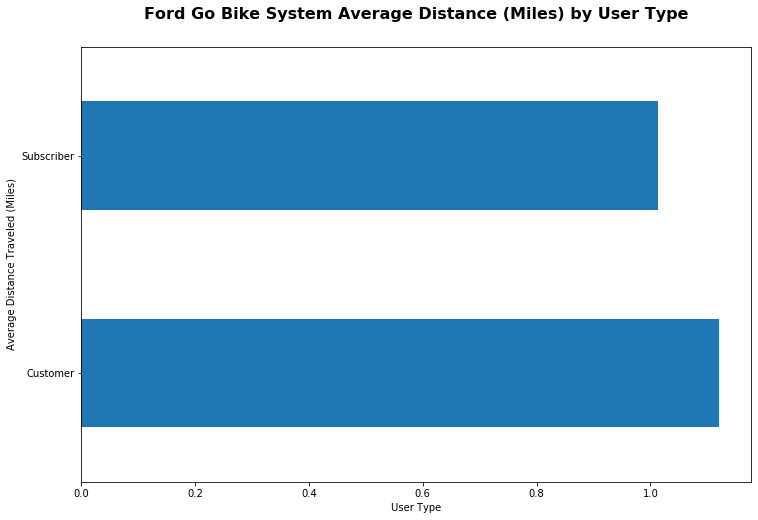

In [35]:
plt = df_clean.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

## Daily usage of the bike share system per user type and Bike sharing type

> This visualization shows the daily trips taken by customers and subscribers and if the bikes were for sharing or not


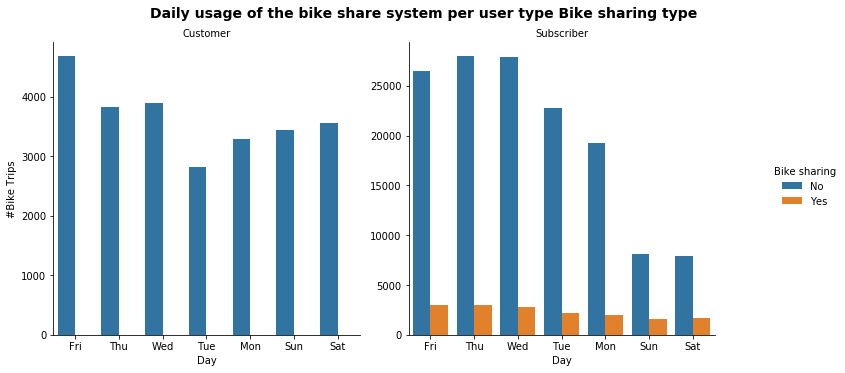

In [36]:

g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue="bike_share_for_all_trip", kind='count', sharey = False)
g.set_axis_labels("Day", "#Bike Trips")
g._legend.set_title('Bike sharing')
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type and Bike sharing type', y=1.03, fontsize=14, fontweight='semibold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!